In [3]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import glob
import random
import tqdm
from tqdm import tqdm, trange
import shutil

from pathlib import Path

import ipdb

import pikle as p

In [9]:
from data import *
from util import *
dataset = 'chairs'
srn_base_train = f'/mnt/lustre/yslan/Repo/NVS/Projects/volume_rendering/srn_dataset/{dataset}'


<function util.util.calculate_mean_std(dataset_loader)>

In [84]:
img = train_test[0]['images'][0]

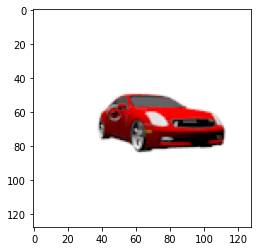

In [85]:
plt.imshow(img)

In [10]:
from torchvision import datasets, transforms

dst_path_v0='/mnt/lustre/yslan/Repo/NVS/Projects/volume_rendering/srn_dataset/{}_pool/'.format(dataset)

data_transform = transforms.Compose(
    [
        # transforms.RandomSizedCrop(224),
        # transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.9084, 0.9045, 0.9019], std=[0.2319, 0.2415, 0.2483] # chairs
#             mean = [0.9052, 0.8945, 0.8894], std=[0.2232, 0.2390, 0.2472] # cars
        ),
    ]
)

external_dataset = datasets.ImageFolder(root=dst_path, transform=data_transform)
len(external_dataset)

115300

In [107]:
dataset_loader = torch.utils.data.DataLoader(external_dataset, batch_size=32, shuffle=False, num_workers=4)

In [12]:
memory_bank = torch.load(f'/mnt/lustre/yslan/Repo/NVS/Projects/volume_rendering/srn_dataset/{dataset}_pool_memory_bank.pt')

In [16]:
rand_idxs = np.random.randint(0,len(external_dataset), 10000)

In [26]:
dst_path=f'/mnt/lustre/yslan/Repo/NVS/Projects/volume_rendering/srn_dataset/{dataset}_pool_sub/100'
os.mkdir(dst_path)

In [92]:
for dsize in [100,200,500,1000,2000,5000,10000]:
    d_path = Path(f'/mnt/lustre/yslan/Repo/NVS/Projects/volume_rendering/srn_dataset/{dataset}_pool_sub/{dsize}')
    d_path.mkdir(parents=True, exist_ok=True)
    
#     torch.save(memory_bank[rand_idxs[:dsize]], d_path/ 'memory_bank.pt')
#     torch.save(
#         torch.stack([external_dataset[i][0] for i in rand_idxs[:dsize]]), d_path/'imgs.pt')
#     np.save(f'/mnt/lustre/yslan/Repo/NVS/Projects/volume_rendering/srn_dataset/{dataset}_pool_sub/{dsize}/idx.npy', rand_idxs[:dsize])
    img_paths = [external_dataset.imgs[i][0] for i in rand_idxs[:dsize]]
    with open(f'/mnt/lustre/yslan/Repo/NVS/Projects/volume_rendering/srn_dataset/{dataset}_pool_sub/{dsize}/paths.txt', 'w') as f:
        for item in img_paths:
            f.write("%s\n" % item)
    

In [94]:
with open(f'/mnt/lustre/yslan/Repo/NVS/Projects/volume_rendering/srn_dataset/{dataset}_pool_sub/{dsize}/paths.txt', 'r') as f:
    paths = f.readlines()

In [83]:
ordered_sim = torch.load('debug/ordered_sim_1w.pt').numpy()

In [86]:
for dsize in [100,200,500,1000,2000,5000]:
    d_path = Path(f'/mnt/lustre/yslan/Repo/NVS/Projects/volume_rendering/srn_dataset/{dataset}_pool_sub/{dsize}_sim')
    d_path.mkdir(parents=True, exist_ok=True)
    
#     torch.save(memory_bank[rand_idxs[:dsize]], d_path/ 'memory_bank.pt')
    torch.save(
        torch.stack([external_dataset[i][0] for i in rand_idxs[ordered_sim[:dsize]]]), d_path/'imgs.pt')
    np.save(f'/mnt/lustre/yslan/Repo/NVS/Projects/volume_rendering/srn_dataset/{dataset}_pool_sub/{dsize}/idx.npy', rand_idxs[[ordered_sim[:dsize]]])
    

<ipython-input-86-144673eb37e6>:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  np.save(f'/mnt/lustre/yslan/Repo/NVS/Projects/volume_rendering/srn_dataset/{dataset}_pool_sub/{dsize}/idx.npy', rand_idxs[[ordered_sim[:dsize]]])


In [88]:
rand_idxs[ordered_sim]

array([113584,  64327,  13100, ...,  46885,  73896,  64152])

[external_dataset[i] for i in rand_idxs[:10]]

In [52]:
from torch.utils.data import DataLoader,  TensorDataset

In [68]:
imgs_tensor = torch.load()

In [70]:
Path(f'/mnt/lustre/yslan/Repo/NVS/Projects/volume_rendering/srn_dataset/{dataset}_pool_sub/{500}/imgs.pt').parent

PosixPath('/mnt/lustre/yslan/Repo/NVS/Projects/volume_rendering/srn_dataset/chairs_pool_sub/500')

In [55]:
imgs_tensor.shape

torch.Size([500, 3, 128, 128])

In [58]:
loader = DataLoader(TensorDataset(imgs_tensor), batch_size=32, shuffle=False, num_workers=4)

In [61]:
batch = next(iter(loader))

In [73]:
f'{1 if True else 2}1'

'11'

In [74]:
from tqdm import trange
from time import sleep

t = trange(100, desc='Bar desc', leave=True)
for i in t:
    t.set_description("Bar desc (file %i)" % i)
    t.refresh() # to show immediately the update
    sleep(0.01)

Bar desc (file 99): 100%|██████████| 100/100 [00:01<00:00, 86.79it/s]
